# Supervised machine Learning-Regression Analysis

# This script contains the following:

1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis Bonus: performance improvement after removing outliers

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path=r'C:\Users\sruth\OneDrive\Desktop\Career Foundry\Data Immersion\A6-Advanced Analytics & Dashboard design\6.4 Supervised machinelearning-Regression'

In [4]:
df_bank=pd.read_csv(os.path.join(path,'Data','Prepared data','Bank Transactions2.csv'))


## Hypothesis:
## 1. The balance of the customer's account increases if the age increases.

## 2. If Age increases, then the transaction amount increases.

# 2.Data Cleaning

In [5]:
df_bank.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,month of transaction,Trans_monthname,Month_spend,Age_Group,Age_Category,State
0,T3,C4417068,1996-11-26,F,Mumbai,17874.44,2016-02-08,15:38:32,459.0,26,2,Feb,Low spending Month,26-35,Low spenders,Maharashtra
1,T4,C5342380,1973-09-14,F,Mumbai,866503.21,2016-02-08,15:38:34,2060.0,50,2,Feb,Low spending Month,45+,Medium spenders,Maharashtra
2,T5,C9031234,1988-03-24,F,Mumbai,6714.43,2016-02-08,02:19:16,1762.5,35,2,Feb,Low spending Month,26-35,High spenders,Maharashtra
3,T7,C7126560,1992-01-26,F,Mumbai,973.46,2016-02-08,00:16:46,566.0,31,2,Feb,Low spending Month,26-35,High spenders,Maharashtra
4,T8,C1220223,1982-01-27,M,Mumbai,95075.54,2016-02-08,23:22:17,148.0,41,2,Feb,Low spending Month,36-45,Medium spenders,Maharashtra


In [6]:
df_bank_sub=df_bank[['Age','TransactionAmount (INR)','CustAccountBalance']]

In [7]:
df_bank_sub.head()

,Age,TransactionAmount (INR),CustAccountBalance
0,26,459.0,17874.44
1,50,2060.0,866503.21
2,35,1762.5,6714.43
3,31,566.0,973.46
4,41,148.0,95075.54


### Missing values Check

In [8]:
# Check for missing values

df_bank_sub.isnull().sum()

# No missing values

Age                        0
TransactionAmount (INR)    0
CustAccountBalance         0
dtype: int64

### Duplicate check

In [9]:
dups=df_bank_sub.duplicated()

In [10]:
dups.shape

(660304,)

In [17]:
# No Duplicates

### Extreme values checks

C:\Users\sruth\AppData\Local\Temp\ipykernel_6484\439776439.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_bank_sub['CustAccountBalance'], bins=25) # Shows extreme values


<Axes: xlabel='CustAccountBalance', ylabel='Density'>

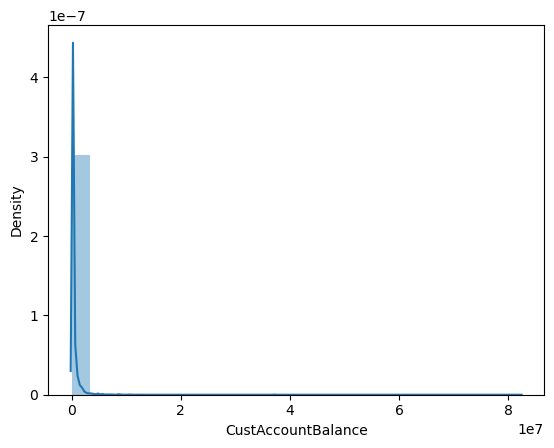

In [11]:
sns.distplot(df_bank_sub['CustAccountBalance'], bins=25) # Shows extreme values

In [25]:
df_bank_sub['CustAccountBalance'].min() # Check the min

0.0

In [13]:
df_bank_sub['TransactionAmount (INR)'].min() # Check the min

0.0

In [20]:
df_bank_sub['CustAccountBalance'].mean() # Check the mean

132449.4745887804

In [14]:
df_bank_sub['TransactionAmount (INR)'].mean() # Check the mean

1623.0029474454193

In [21]:
df_bank_sub['CustAccountBalance'].median() # Check the median

19892.915

In [15]:
df_bank_sub['TransactionAmount (INR)'].median() # Check the median

500.0

In [22]:
df_bank_sub['CustAccountBalance'].max() # Check the max

82244629.9

In [16]:
df_bank_sub['TransactionAmount (INR)'].max() # Check the max

1560034.99

In [28]:
df_bank_sub.shape

(660304, 3)

In [18]:
# create a dataframe with exclude age 0
df_bank_age= df_bank_sub[df_bank_sub['Age'] != 0]

In [27]:
df_bank_age.shape

(566082, 3)

# 3.1.Data prep for regression analysis- Age vs CustAccountBalance

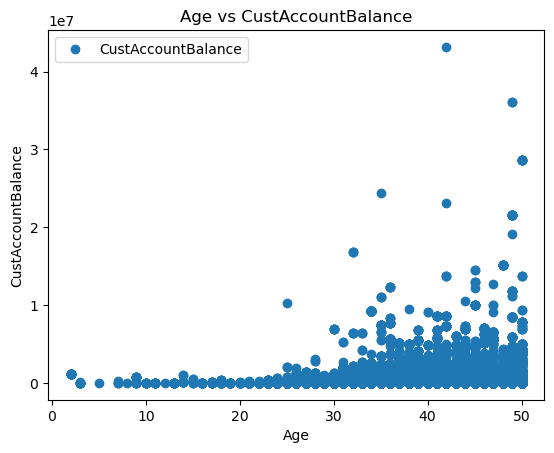

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_bank_age.plot(x = 'Age', y='CustAccountBalance',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs CustAccountBalance')  
plt.xlabel('Age')  
plt.ylabel('CustAccountBalance')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_bank_age['Age'].values.reshape(-1,1)
y = df_bank_age['CustAccountBalance'].values.reshape(-1,1)

In [31]:
X

array([[26],
       [50],
       [35],
       ...,
       [33],
       [34],
       [39]], dtype=int64)

In [32]:
y

array([[ 17874.44],
       [866503.21],
       [  6714.43],
       ...,
       [  7635.19],
       [221757.06],
       [ 75734.42]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4.1Regression analysis-  Age vs CustAccountBalance

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

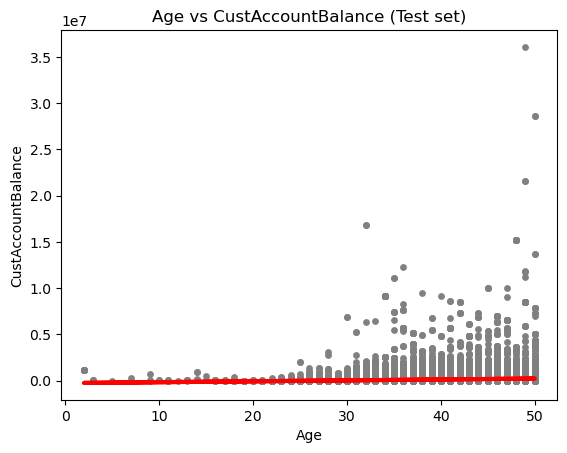

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs CustAccountBalance (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('CustAccountBalance')
plot_test.show()

In [26]:
# To check accuracy Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [85]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ',rmse)
print('R2 score: ', r2)

Slope: [[7918.84366738]]
Mean squared error:  8657042272.64877
R2 score:  -259.474342962711


In [29]:
y_predicted

array([[187728.27589527],
       [118848.26656543],
       [ 99168.26389976],
       ...,
       [ 99168.26389976],
       [ 10608.25190424],
       [187728.27589527]])

In [42]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,19476.11,187728.275895
1,4987.29,118848.266565
2,171427.90,99168.263900
3,13479.44,138528.269231
4,6248.47,59808.258568
5,7788.44,227088.281227
6,68343.18,89328.262567
7,6633.97,49968.257236
8,95844.09,138528.269231
9,80292.32,109008.265233


#### Here the model is not a good fit.Most of the datapoints are far from the trend line, which indicates that there are not a linear relationship between both variables.
#### The MSE is large(Regression may not be the best model) and the R2 score is practically 0 (less fit) .
#### The slope is 9840 indicating  the positive relationship between Age and CustAccountBalance.ie when Age increases then the custAcc balance also increases
#### There is difference between the actual and predicted y values

# Compare how the regression fits the training set -Age vs CustAccountBalance

In [30]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9840.00133284]]
Mean squared error:  160804327093.2239
R2 score:  0.01806885431540295


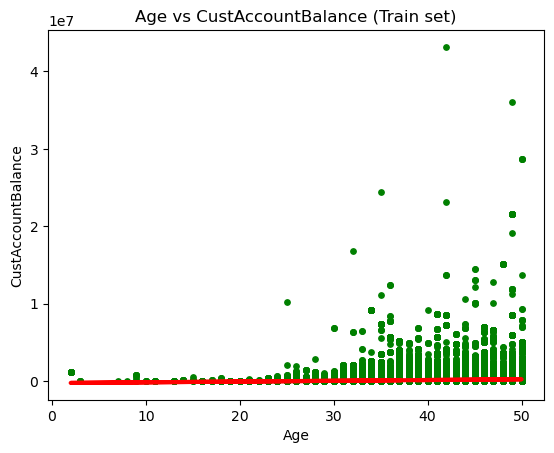

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs CustAccountBalance (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('CustAccountBalance')
plot_test.show()

#### The results of the models on the training set are similar to those on the test set. This supports our earlier assumption that the model is not suitable.

# Bonus: performance improvement after removing outliers-Age vs CustAccountBalance

In [45]:
# Clean the extreme values from the "CustAccountBalance" variable observed during the consistency checks.

df_test = df_bank_age[(df_bank_age['CustAccountBalance'] >0) & (df_bank_age['CustAccountBalance'] <5000000)] 

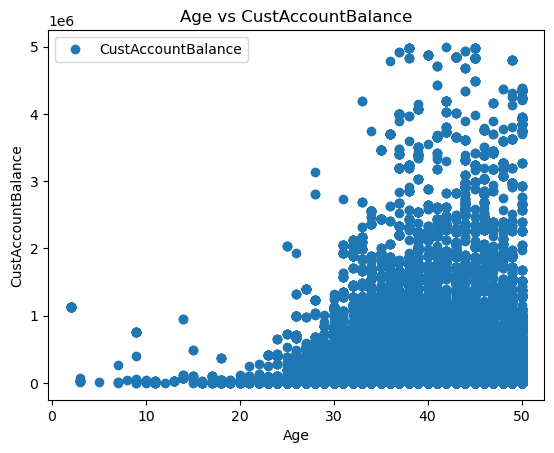

In [46]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Age', y='CustAccountBalance', style='o')  
plt.title('Age vs CustAccountBalance')  
plt.xlabel('Age')  
plt.ylabel('CustAccountBalance')  
plt.show()

In [47]:
# Reshape again.

X_2 = df_test['Age'].values.reshape(-1,1)
y_2 = df_test['CustAccountBalance'].values.reshape(-1,1)

In [48]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [49]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [50]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [51]:
 # Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [52]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[7918.84366738]]
Mean squared error:  61370928459.160645
R2 score:  0.028238054273712954


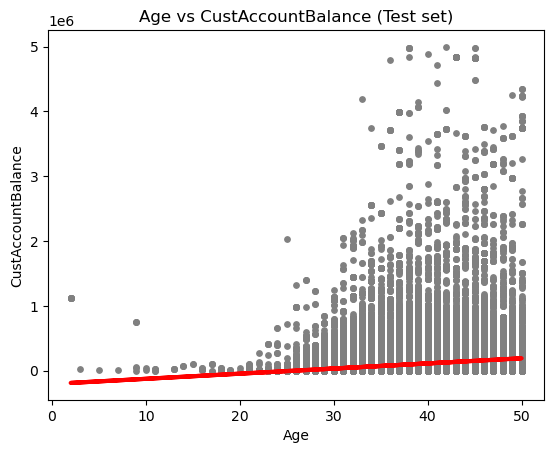

In [53]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Age vs CustAccountBalance (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('CustAccountBalance')
plot_test.show()

In [54]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,21804.85,25438.321751
1,56202.21,104626.758425
2,6.30,33357.165419
3,56491.99,72951.383756
4,1932.62,49194.852753
5,16788.32,104626.758425
6,7539.95,72951.383756
7,50514.35,152139.820429
8,5870.18,57113.696421
9,68593.23,160058.664097


## There is a positive correlation between age and customer account balance, as seen here as well, but due to the MSE & R2 score value, this model is not suitable for making predictions.

# 3.2 Data prep for regression analysis - Age Vs TransactionAmount (INR)

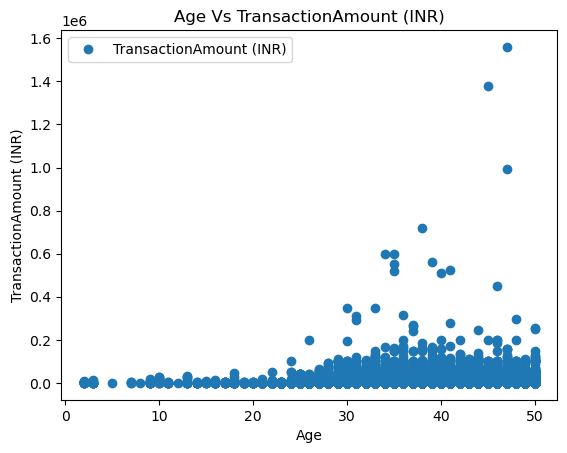

In [63]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_bank_age.plot(x = 'Age', y='TransactionAmount (INR)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age Vs TransactionAmount (INR)')  
plt.xlabel('Age')  
plt.ylabel('TransactionAmount (INR)')  
plt.show()

In [64]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = df_bank_age['Age'].values.reshape(-1,1)
y1 = df_bank_age['TransactionAmount (INR)'].values.reshape(-1,1)

In [65]:
X1

array([[26],
       [50],
       [35],
       ...,
       [33],
       [34],
       [39]], dtype=int64)

In [66]:
y1

array([[ 459. ],
       [2060. ],
       [1762.5],
       ...,
       [ 799. ],
       [ 770. ],
       [1166. ]])

In [67]:
# Split data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

# 4.1 Regression Analysis=Age Vs TransactionAmount (INR)

In [68]:
# Create a regression object.

regression1 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [69]:
# Fit the regression object onto the training set.

regression1.fit(X1_train, y1_train)

LinearRegression()

In [70]:
# Predict the values of y1 using X1.

y1_predicted = regression.predict(X1_test)

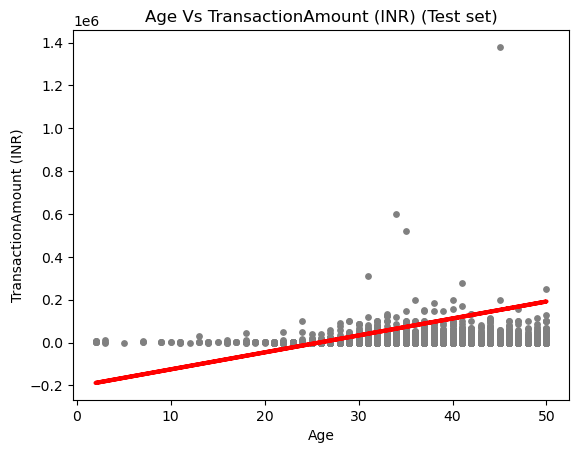

In [71]:
# Create a plot that shows the regression line from the model on the test set.

plot_test1 = plt
plot_test1.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test1.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test1.title('Age Vs TransactionAmount (INR) (Test set)')
plot_test1.xlabel('Age')
plot_test1.ylabel('TransactionAmount (INR)')
plot_test1.show()

In [72]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y1_test, y1_predicted) # This is the mean squared error
r2 = r2_score(y1_test, y1_predicted) # This is the R2 score.

In [73]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[7918.84366738]]
Mean squared error:  8660342000.536896
R2 score:  -255.27697573129564


In [74]:
y_predicted

array([[187728.27589527],
       [118848.26656543],
       [ 99168.26389976],
       ...,
       [ 99168.26389976],
       [ 10608.25190424],
       [187728.27589527]])

In [76]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1583.50,160058.664097
1,1100.00,104626.758425
2,1000.00,88789.071090
3,125.00,120464.445760
4,190.00,57113.696421
5,5943.00,191734.038766
6,559.00,80870.227423
7,175.00,49194.852753
8,270.00,120464.445760
9,499.00,96707.914758


#### Here the model is not a good fit.Most of the datapoints are far from the trend line, which indicates that there are not a linear relationship between both variables.
#### The MSE is large(Regression may not be the best model) and the R2 score is -ve (not a good fit) .
#### The slope is 7918 indicating  the positive relationship between Age and TransactionAmount (INR).ie when Age increases then the Transaction amount also increases
#### There is difference between the actual and predicted y values

### Compare how the regression fits the training set

In [79]:
# Predict.

y1_predicted_train = regression.predict(X1_train) # This is predicting X_train!

In [80]:
rmse = mean_squared_error(y1_train, y1_predicted_train)
r2 = r2_score(y1_train, y1_predicted_train)

In [81]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[7918.84366738]]
Mean squared error:  8657042272.64877
R2 score:  -259.474342962711


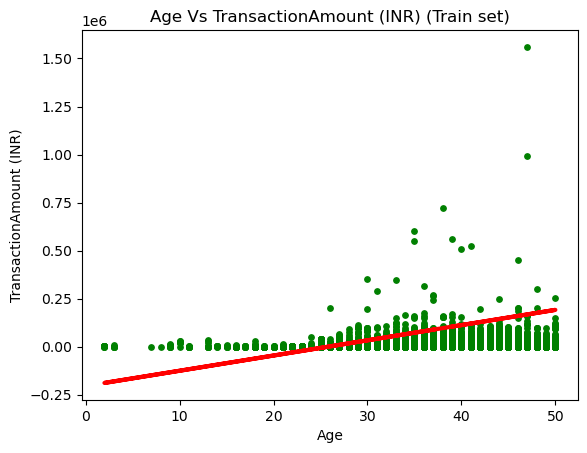

In [83]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X1_train, y1_train, color='green', s = 15)
plot_test.plot(X1_train, y1_predicted_train, color='red', linewidth =3)
plot_test.title('Age Vs TransactionAmount (INR) (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('TransactionAmount (INR)')
plot_test.show()

## There is a positive correlation between age and TransactionAmount, as seen here as well, but due to the MSE & R2 score value, this model is not suitable for making predictions.